In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv


<Figure size 1200x600 with 0 Axes>

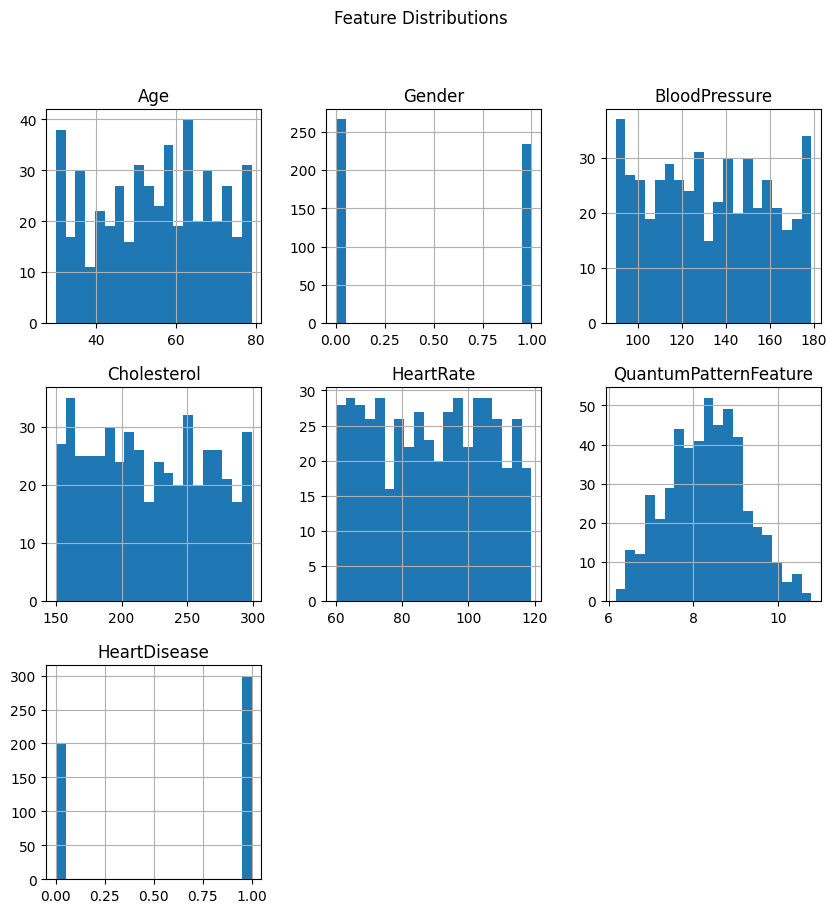

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

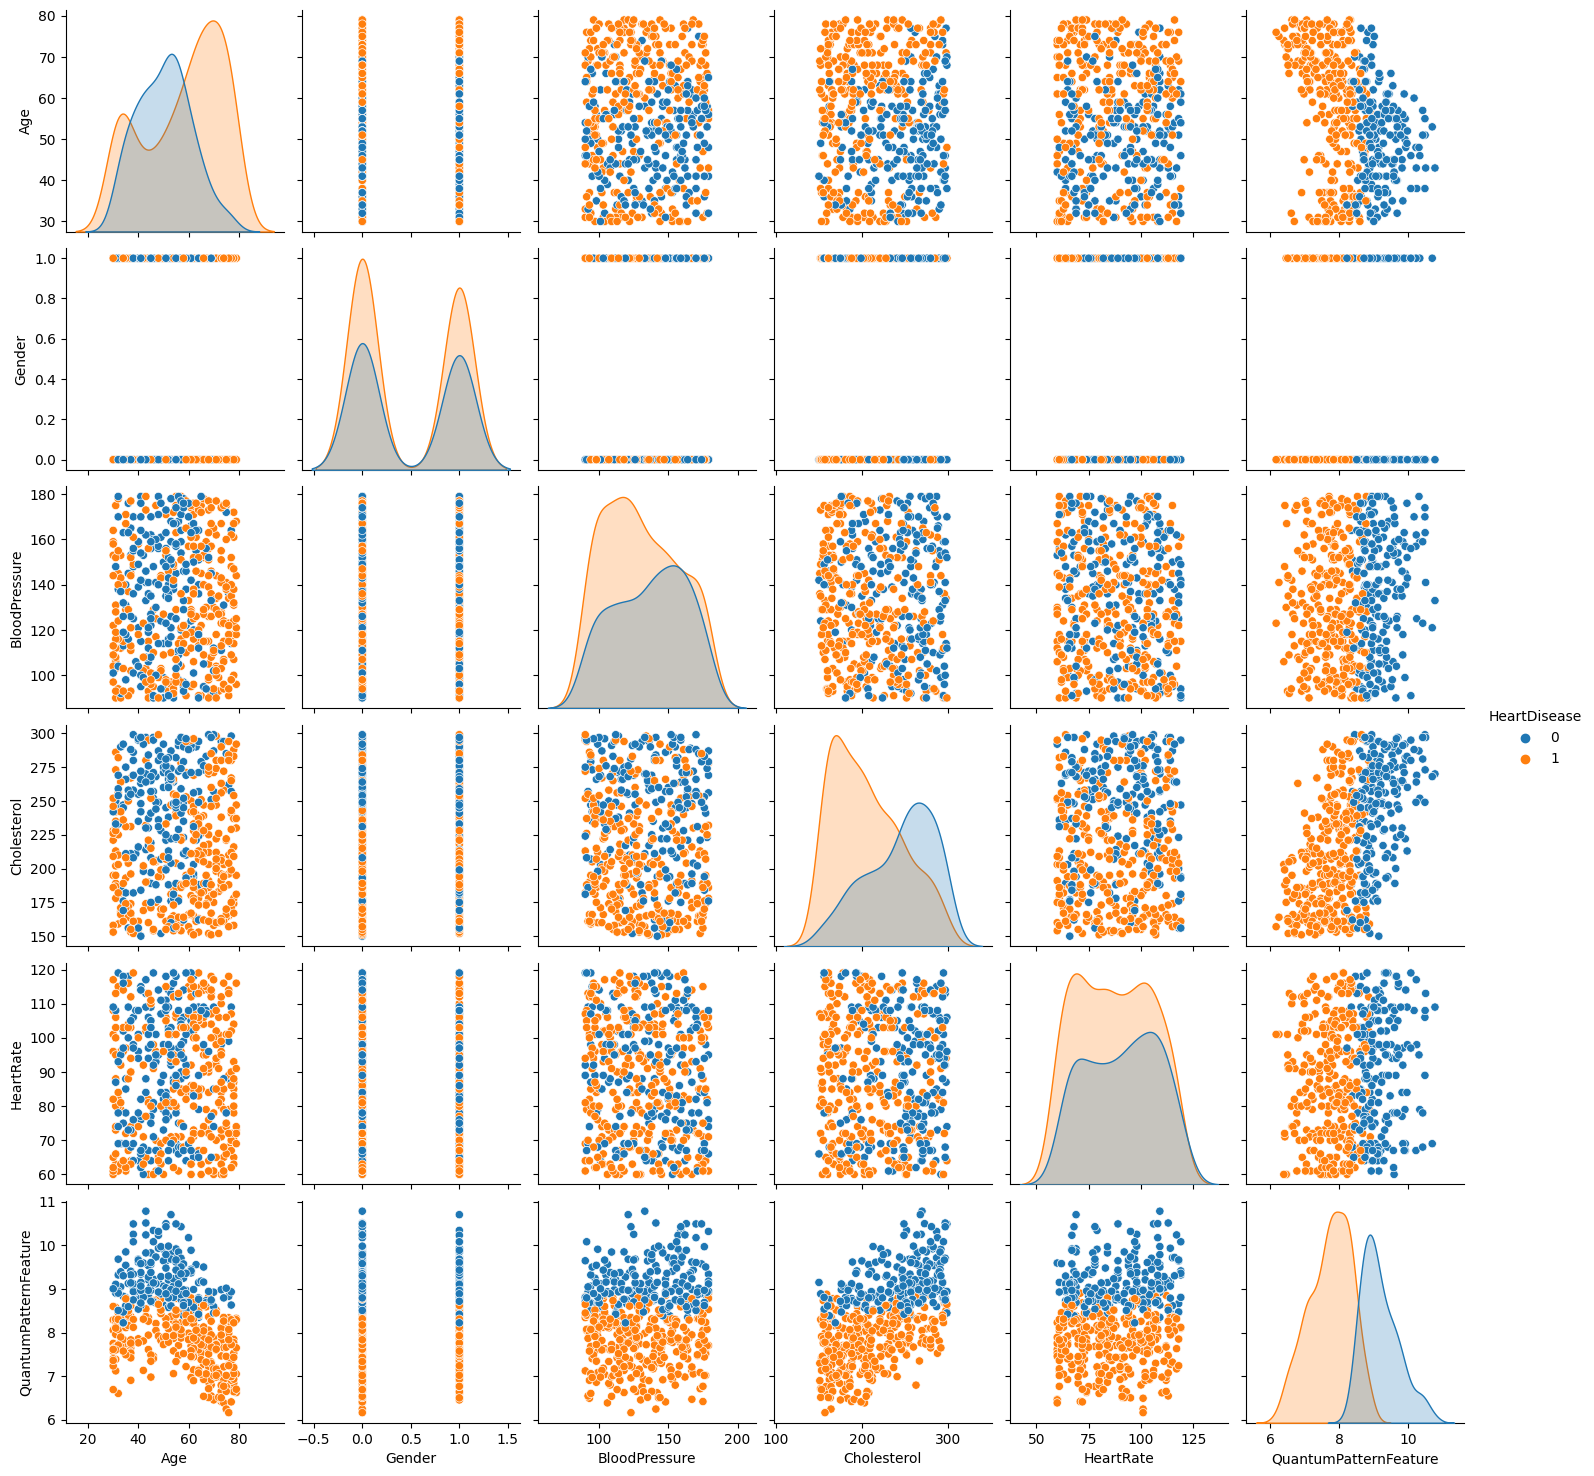

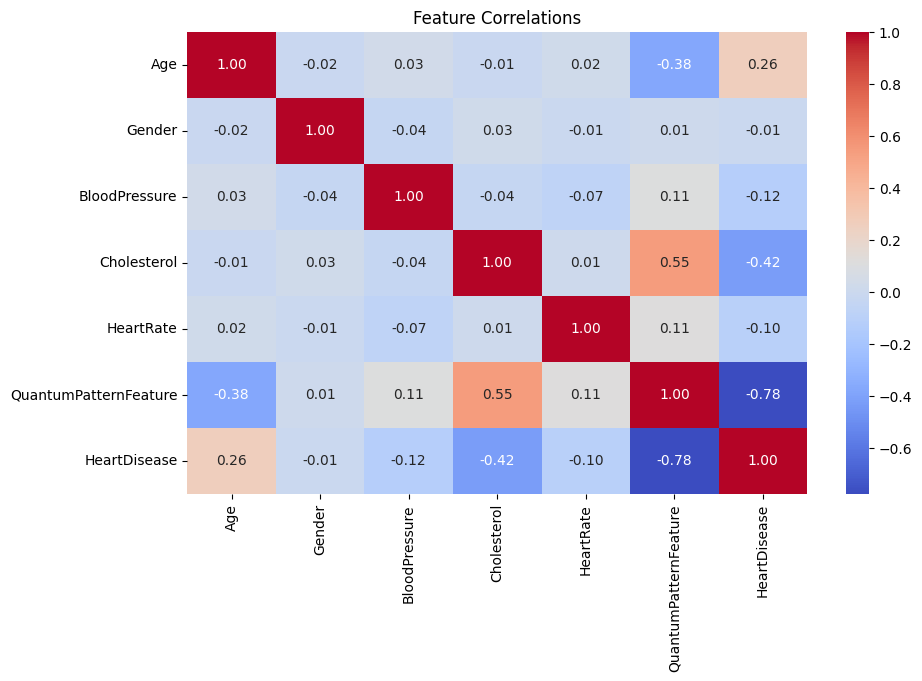


Logistic Regression
Accuracy: 0.7700
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        40
           1       0.79      0.83      0.81        60

    accuracy                           0.77       100
   macro avg       0.76      0.75      0.76       100
weighted avg       0.77      0.77      0.77       100


Decision Tree
Accuracy: 0.7300
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        40
           1       0.77      0.78      0.78        60

    accuracy                           0.73       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.73      0.73      0.73       100


Random Forest
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        40
           1       0.83      0.83      0.83        60

    accuracy                           0.80       100
   macro avg       0.79   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('/kaggle/input/heart-prediction-dataset-quantum/Heart Prediction Quantum Dataset.csv')  

plt.figure(figsize=(12, 6))
df.hist(figsize=(10, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

sns.pairplot(df, hue="HeartDisease")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

X = df.drop(columns=["HeartDisease", "QuantumPatternFeature"])
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("\nLogistic Regression")
train_model(LogisticRegression(), X_train, y_train, X_test, y_test)

print("\nDecision Tree")
train_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

print("\nRandom Forest")
train_model(RandomForestClassifier(n_estimators=100), X_train, y_train, X_test, y_test)

print("\nSupport Vector Machine")
train_model(SVC(), X_train, y_train, X_test, y_test)



In [3]:
X.shape, y.shape, X_test.shape, X_train.shape

((500, 5), (500,), (100, 5), (400, 5))

In [4]:
X.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate
0,68,1,105,191,107
1,58,0,97,249,89
2,44,0,93,190,82
3,72,1,93,183,101
4,37,0,145,166,103


In [5]:

print("\nNeural Network")
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_test, y_test))
loss, acc = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {acc:.4f}")


Neural Network
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4770 - loss: 0.7071 - val_accuracy: 0.6300 - val_loss: 0.6245
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6658 - loss: 0.6206 - val_accuracy: 0.7000 - val_loss: 0.5766
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7067 - loss: 0.5870 - val_accuracy: 0.7300 - val_loss: 0.5393
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7390 - loss: 0.5453 - val_accuracy: 0.7700 - val_loss: 0.5174
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7522 - loss: 0.5086 - val_accuracy: 0.7800 - val_loss: 0.5025
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.5221 - val_accuracy: 0.8000 - val_loss: 0.4864
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7310 - loss: 0.4990 - val_accuracy: 0.7900 - val_loss: 0.4813
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7520 - loss: 0.4824 - val_accuracy: 0.8000 - val_loss: 0.

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# 1. згенеруйте нові фічі
df = X.copy()
df['AgeBucket'] = pd.cut(df['Age'], [0,40,55,65,120], labels=[0,1,2,3]).astype(int)
df['Chol_per_Age'] = df['Cholesterol'] / df['Age']
df['HR_pct_max'] = df['HeartRate'] / (220 - df['Age'])

# 2. визначте числові та категоріальні колонки
num_cols = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 
            'Chol_per_Age', 'HR_pct_max']
cat_cols = ['Gender', 'AgeBucket']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LogisticRegression(penalty='l1', solver='saga', max_iter=1000))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(df, y)

print("Best AUC:", grid.best_score_)
print("Selected features (non-zero):", grid.best_estimator_['clf'].coef_)

Best AUC: 0.8394166666666667
Selected features (non-zero): [[ 1.7809732  -0.39766439 -2.15003026 -0.30681468  1.66795902  0.
   0.03775684 -0.67041074 -0.02909009  1.33001579]]


In [7]:
df

,Age,Gender,BloodPressure,Cholesterol,HeartRate,AgeBucket,Chol_per_Age,HR_pct_max
0,68,1,105,191,107,3,2.808824,0.703947
1,58,0,97,249,89,2,4.293103,0.549383
2,44,0,93,190,82,1,4.318182,0.465909
3,72,1,93,183,101,3,2.541667,0.682432
4,37,0,145,166,103,0,4.486486,0.562842
...,...,...,...,...,...,...,...,...
495,34,0,126,292,116,0,8.588235,0.623656
496,41,0,164,248,114,1,6.048780,0.636872
497,45,1,159,175,75,1,3.888889,0.428571
498,55,0,107,157,101,1,2.854545,0.612121


In [8]:

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:

print("\nNeural Network")
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_test, y_test))
loss, acc = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {acc:.4f}")


Neural Network
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6877 - loss: 0.6295 - val_accuracy: 0.6800 - val_loss: 0.6237
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7287 - loss: 0.5991 - val_accuracy: 0.6700 - val_loss: 0.6044
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7243 - loss: 0.5871 - val_accuracy: 0.6800 - val_loss: 0.5883
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7315 - loss: 0.5722 - val_accuracy: 0.6900 - val_loss: 0.5731
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 0.5638 - val_accuracy: 0.7100 - val_loss: 0.5593
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7472 - loss: 0.5428 - val_accuracy: 0.7300 - val_loss: 0.5465
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7642 - loss: 0.5417 - val_accuracy: 0.7700 - val_loss: 0.5358
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.5406 - val_accuracy: 0.7700 - val_loss: 0.

<ipython-input-10-4fb29ebe86f2>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('coolwarm', 2))  # 2 класи: 0, 1


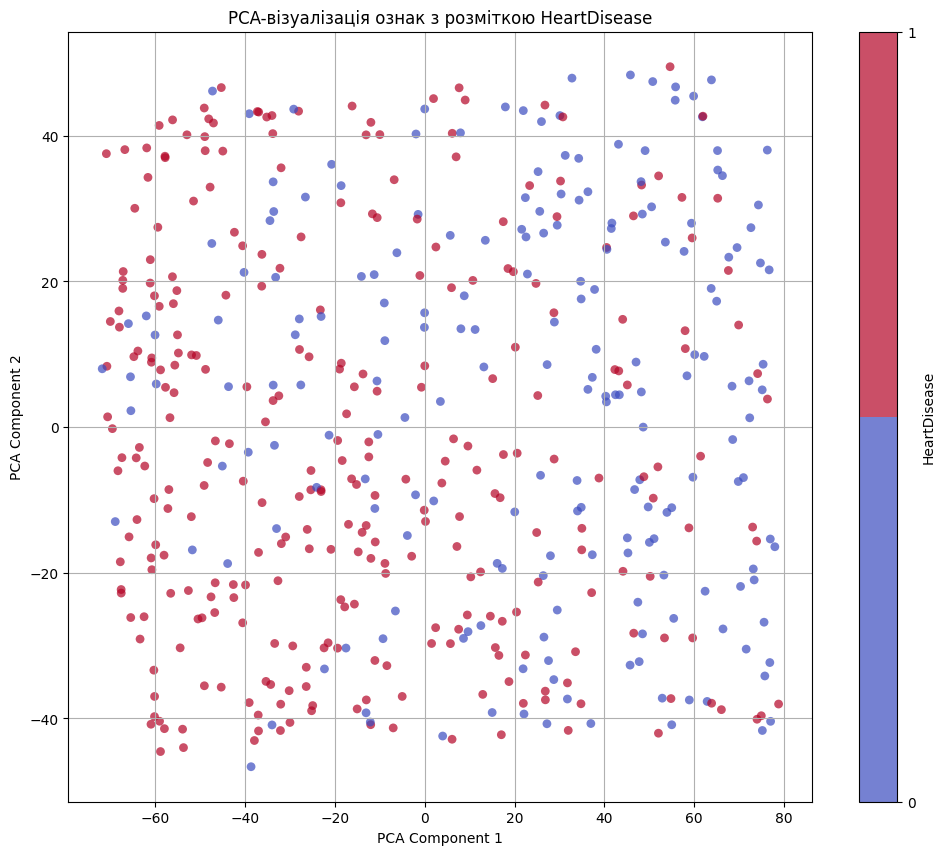

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                      edgecolor='none', alpha=0.7, s=40, 
                      cmap=plt.cm.get_cmap('coolwarm', 2))  # 2 класи: 0, 1
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA-візуалізація ознак з розміткою HeartDisease')
plt.colorbar(scatter, ticks=[0, 1], label='HeartDisease')
plt.grid(True)
plt.show()

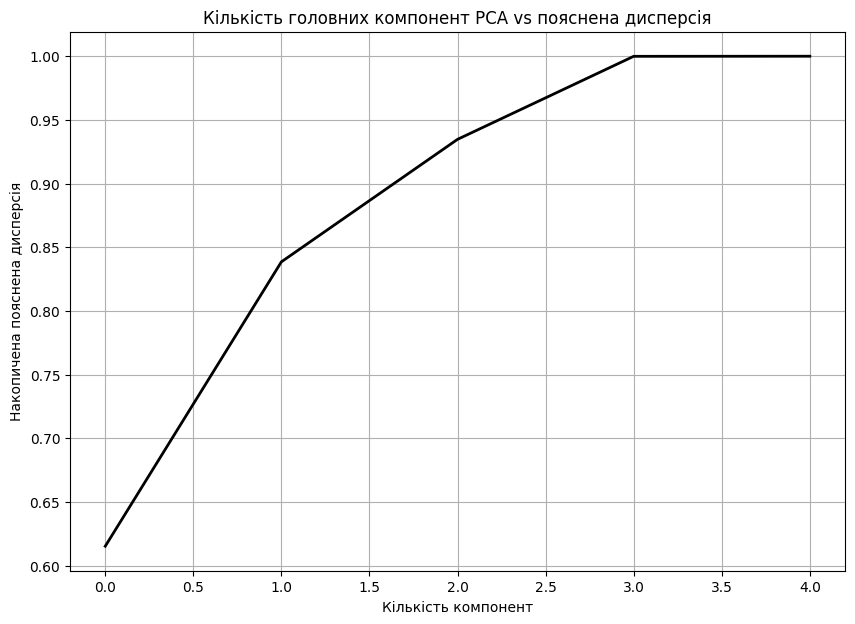

In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Кількість компонент')
plt.ylabel('Накопичена пояснена дисперсія')
plt.title('Кількість головних компонент PCA vs пояснена дисперсія')
plt.grid(True)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes Classifier": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}


In [13]:
# Hyperparameter Grid
param_grid = {
    "Random Forest Classifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    "Decision Tree Classifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan", "minkowski"]
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs", "saga"]
    },
    "Naive Bayes Classifier": {
        "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
    },
    "Gradient Boosting Classifier": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2, 0.3],
        "max_depth": [3, 5, 10],
        "subsample": [0.7, 0.8, 0.9, 1.0]
    }
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_search = RandomizedSearchCV(
        model, param_grid[model_name], 
        n_iter=20, scoring='accuracy', 
        cv=5, random_state=54, n_jobs=-1
    )
    param_search.fit(X_train, y_train)
    best_models[model_name] = param_search.best_estimator_
    print(f"Best parameters for {model_name}: {param_search.best_params_}\n")

Tuning Random Forest Classifier...
Best parameters for Random Forest Classifier: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}

Tuning Decision Tree Classifier...
Best parameters for Decision Tree Classifier: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}

Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

Tuning Naive Bayes Classifier...
Best parameters for Naive Bayes Classifier: {'var_smoothing': 1e-09}

Tuning Gradient Boosting Classifier...
Best parameters for Gradient Boosting Classifier: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3}



In [17]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 0.7800
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        40
           1       0.81      0.83      0.82        60

    accuracy                           0.78       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.78      0.78      0.78       100

Decision Tree Classifier Accuracy: 0.7200
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        40
           1       0.80      0.72      0.75        60

    accuracy                           0.72       100
   macro avg       0.71      0.72      0.71       100
weighted avg       0.73      0.72      0.72       100

K-Nearest Neighbors Accuracy: 0.7900
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        40
           1       0.80      0.87      0.83        60

    accuracy                           0.79       100
   macr

In [18]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    param_search = GridSearchCV(
        model, param_grid[model_name], scoring='accuracy', 
        cv=5, n_jobs=-1
    )
    param_search.fit(X_train, y_train)
    best_models[model_name] = param_search.best_estimator_
    print(f"Best parameters for {model_name}: {param_search.best_params_}\n")

Tuning Random Forest Classifier...
Best parameters for Random Forest Classifier: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Tuning Decision Tree Classifier...
Best parameters for Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Tuning K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Tuning Naive Bayes Classifier...
Best parameters for Naive Bayes Classifier: {'var_smoothing': 1e-09}

Tuning Gradient Boosting Classifier...
Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}




Evaluation Results:

Random Forest Classifier Accuracy: 0.7900
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        40
           1       0.84      0.80      0.82        60

    accuracy                           0.79       100
   macro avg       0.78      0.79      0.78       100
weighted avg       0.79      0.79      0.79       100

Decision Tree Classifier Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.69      0.68      0.68        40
           1       0.79      0.80      0.79        60

    accuracy                           0.75       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100

K-Nearest Neighbors Accuracy: 0.7900
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        40
           1       0.80      0.87      0.83        60

    accuracy                           

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


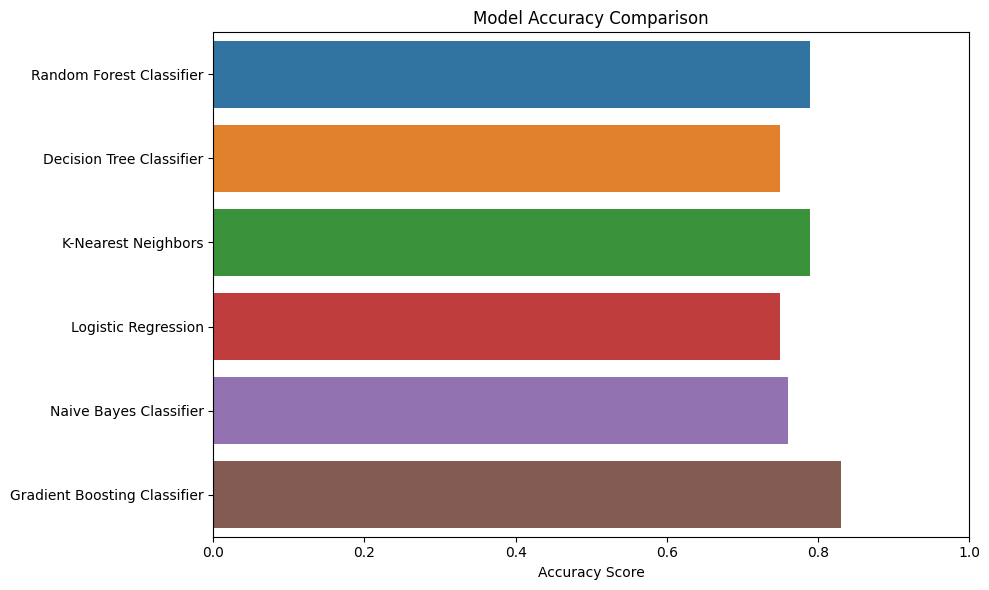

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

accuracy_results = {}

print("\nEvaluation Results:\n")
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
plt.figure(figsize=(10, 6))
model_names = list(accuracy_results.keys())
accuracies = list(accuracy_results.values())
sns.barplot(x=accuracies, y=model_names)
plt.xlabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

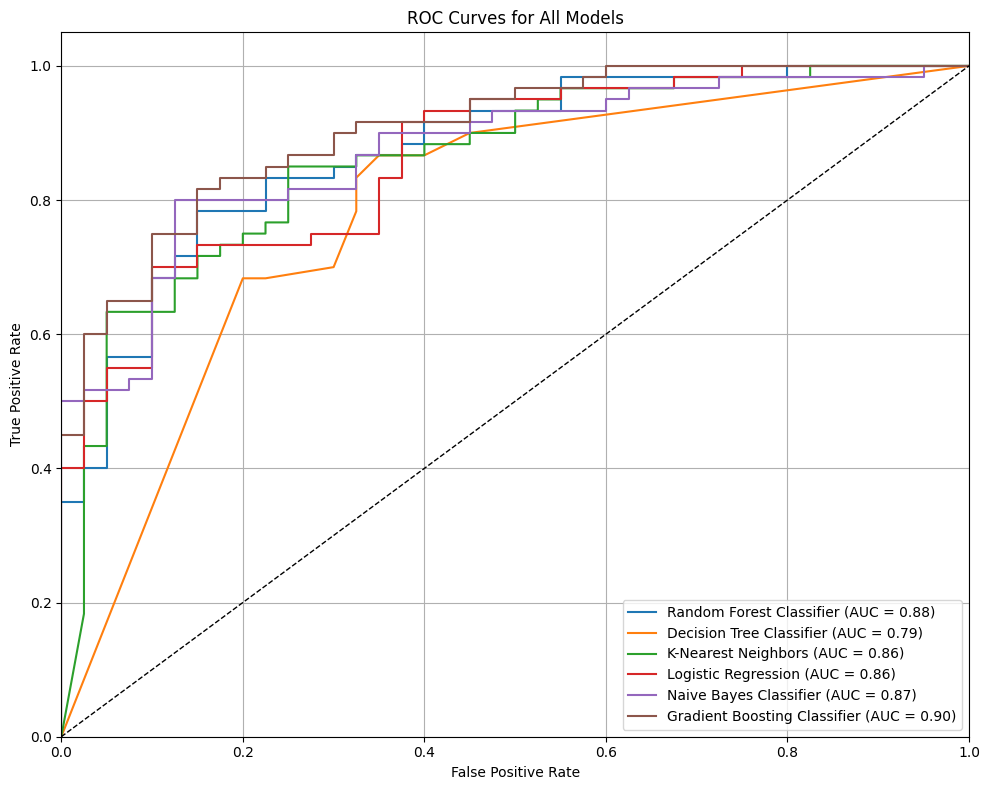

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(10, 8))

for model_name, best_model in best_models.items():
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)[:, 1]
    elif hasattr(best_model, "decision_function"):
        y_score = best_model.decision_function(X_test)
    else:
        print(f"Model {model_name} does not support ROC.")
        continue

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("\nCross-Validation Results:\n")

cv_scores = {}

for model_name, model in best_models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    cv_scores[model_name] = mean_score

    print(f"{model_name}: {mean_score:.4f} ± {std_score:.4f}")


Cross-Validation Results:

Random Forest Classifier: 0.7740 ± 0.0102
Decision Tree Classifier: 0.7140 ± 0.0320
K-Nearest Neighbors: 0.7320 ± 0.0223
Logistic Regression: 0.7220 ± 0.0466
Naive Bayes Classifier: 0.7680 ± 0.0392
Gradient Boosting Classifier: 0.8000 ± 0.0253
